## Name: Prasad Uttam Belote

## Task 2 - Exploratory Data Analysis on dataset "Terrorism"



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1',low_memory = False)

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

***Clearly there are null values present in some of the features***

In [10]:
#Considering the features which will be relevant for the analysis
df=df[['gname' ,'weaptype1_txt','targtype1','targtype1_txt','iyear', 'imonth', 'iday','country', 'country_txt', 'region','region_txt','provstate', 'city', 'attacktype1', 'attacktype1_txt','nkill','nwound', 'weaptype1','natlty1','natlty1_txt']]
df.head()

,gname,weaptype1_txt,targtype1,targtype1_txt,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,attacktype1,attacktype1_txt,nkill,nwound,weaptype1,natlty1,natlty1_txt
0,MANO-D,Unknown,14,Private Citizens & Property,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,1.0,0.0,13,58.0,Dominican Republic
1,23rd of September Communist League,Unknown,7,Government (Diplomatic),1970,0,0,130,Mexico,1,North America,Federal,Mexico city,6,Hostage Taking (Kidnapping),0.0,0.0,13,21.0,Belgium
2,Unknown,Unknown,10,Journalists & Media,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,Assassination,1.0,0.0,13,217.0,United States
3,Unknown,Explosives,7,Government (Diplomatic),1970,1,0,78,Greece,8,Western Europe,Attica,Athens,3,Bombing/Explosion,NaN,NaN,6,217.0,United States
4,Unknown,Incendiary,7,Government (Diplomatic),1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,7,Facility/Infrastructure Attack,NaN,NaN,8,217.0,United States


***Data visualization using correlation matrix***

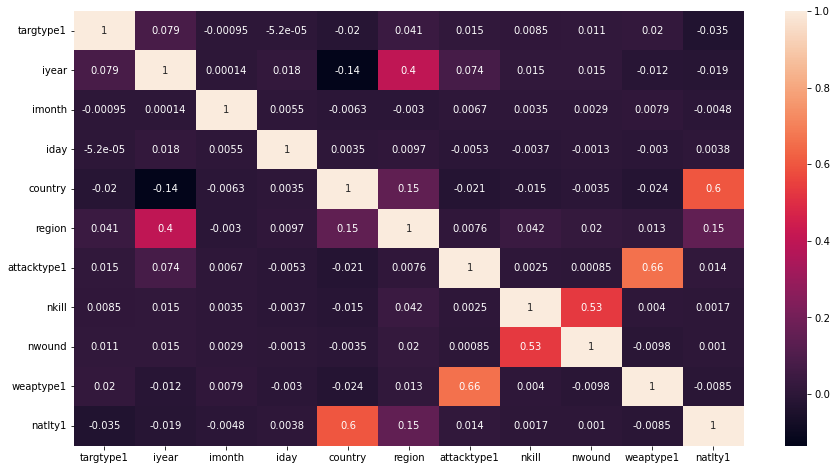

In [24]:
plt.figure(figsize = (15,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

# Analysis  of the Heatmap
***From the heat map we can see that attack type has a positive correlation with weapon type***

***and the number of wounds have a positive correlation with the attack type.***

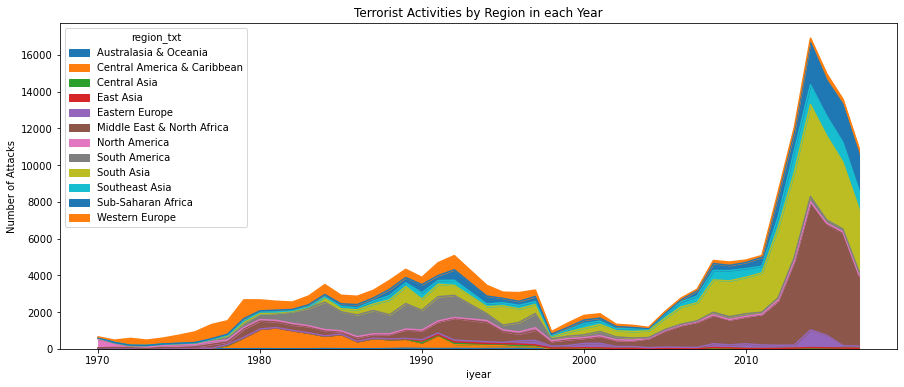

In [12]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

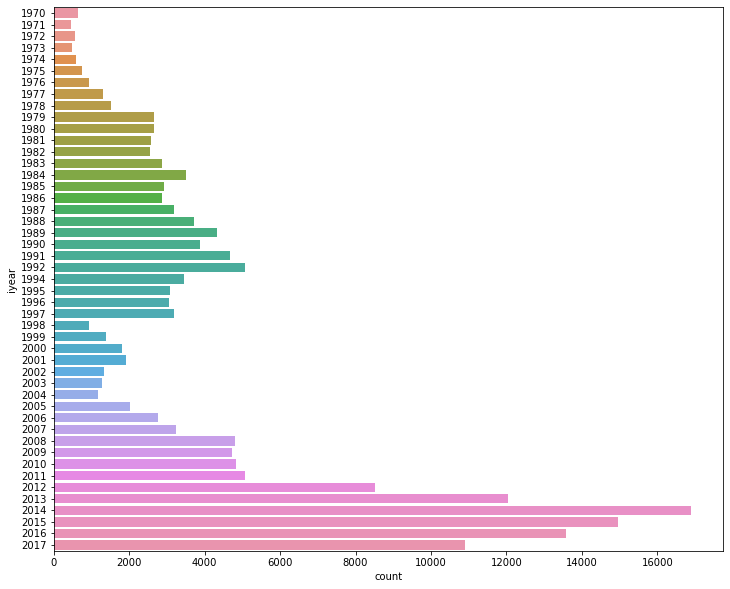

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['iyear'])
plt.show()

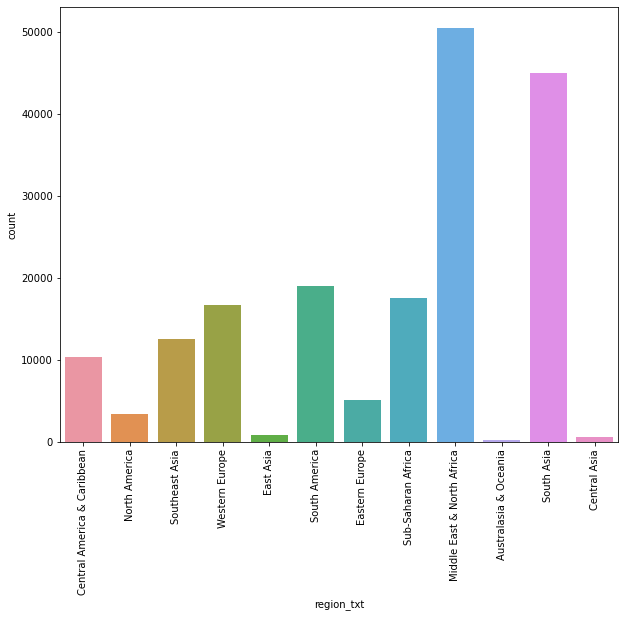

In [14]:
# Plotting a graph of count of terrorism attacks vs the REGIONS
plt.figure(figsize=(10,8))
sns.countplot(x=df["region_txt"])
plt.xticks(rotation = 90)
plt.show()

***Maximum terrorism has occured in Middle East and North Africa followed by South Asia***

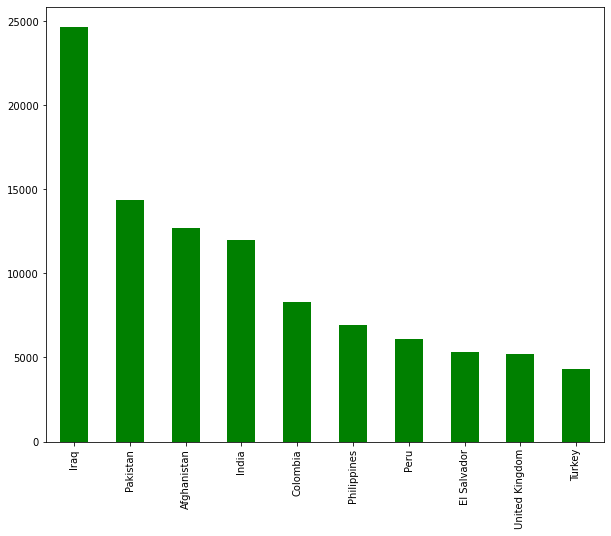

In [15]:
#Plotting the graph of the top 10 countries having the highest terrorism count
plt.figure(figsize=(10,8))
df["country_txt"].value_counts().head(10).plot.bar(color='green')
plt.show()

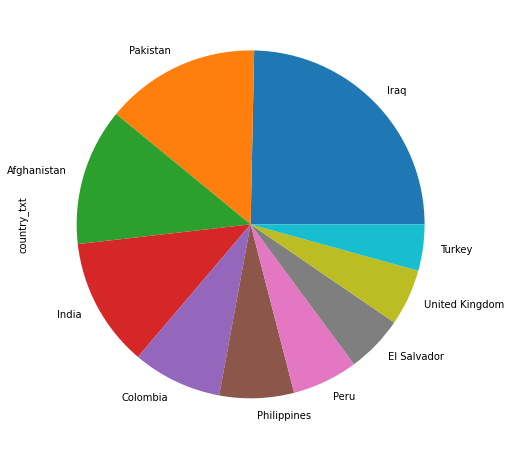

In [16]:
#Forming a pie chart showing the above result
plt.figure(figsize=(10,8))
df["country_txt"].value_counts().head(10).plot.pie()
plt.show()

***From here we can infer that most of the terrorist attacks have occured in Iraq followed by Pakistan,Afganistan and India***

# Therefore Iraq is the hot zone of terrorism 



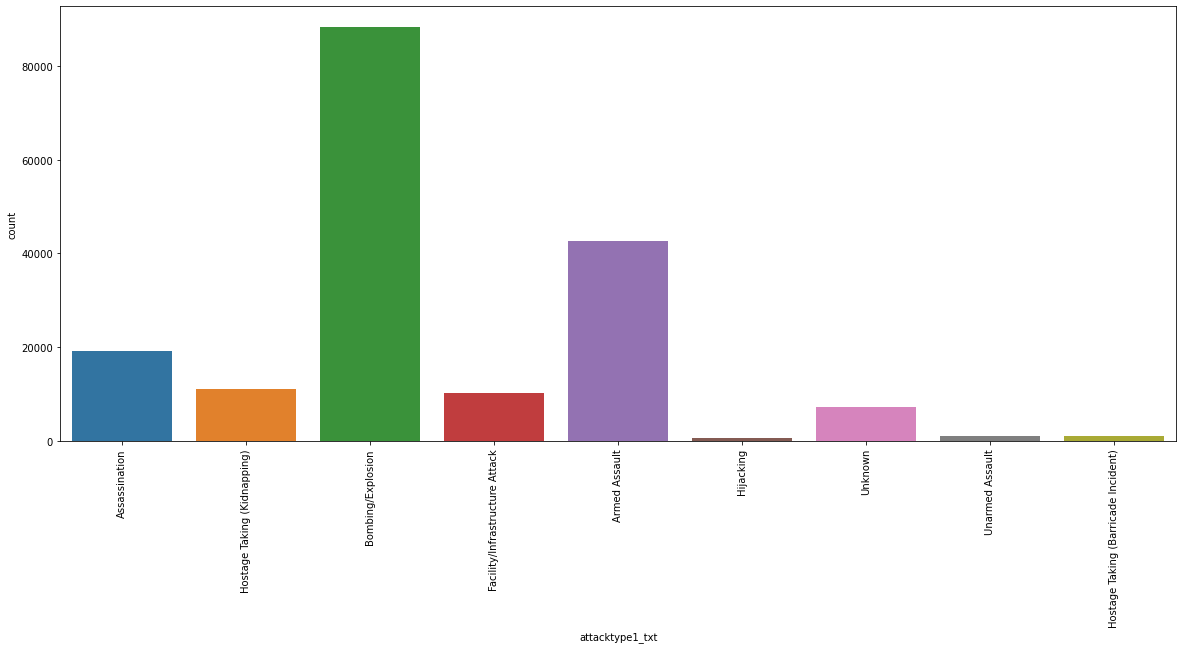

In [17]:
#Plotting the graph of each of the attack type vs its count
plt.figure(figsize=(20,8))
sns.countplot(x=df["attacktype1_txt"])
plt.xticks(rotation = 90)
plt.show()

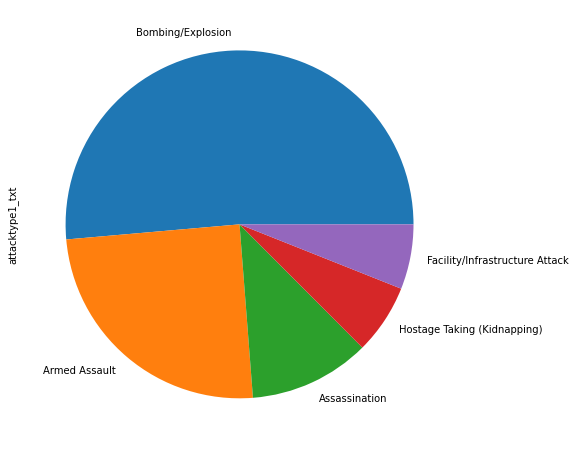

In [18]:
#Pie chart for the above bar result
plt.figure(figsize=(10,8))
df["attacktype1_txt"].value_counts().head(5).plot.pie()
plt.show()

***From here we can infer that explositions are the most common attack type followed by armed assault and assassination.***

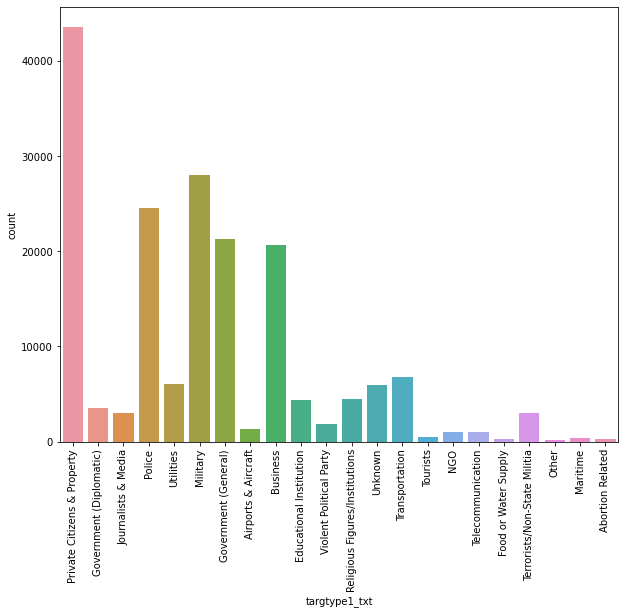

In [19]:
# Plotting the graph of each of the target type vs the terrorism count
plt.figure(figsize=(10,8))
sns.countplot(x=df["targtype1_txt"])
plt.xticks(rotation = 90)
plt.show()

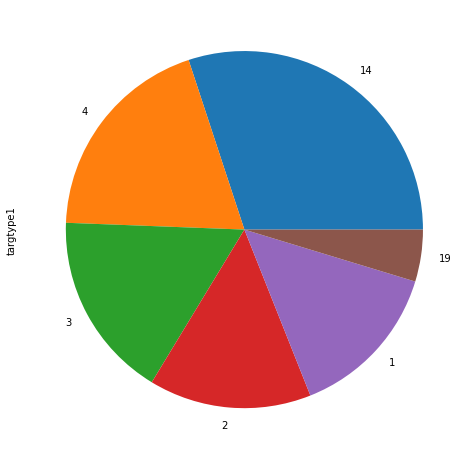

In [20]:
#Pie chart supporting the above result
plt.figure(figsize=(8,15))
df["targtype1"].value_counts().head(6).plot.pie()
plt.show()

***From here we can infer that Private citizens and property are most targetted followed by Military, Police,Government and Business***

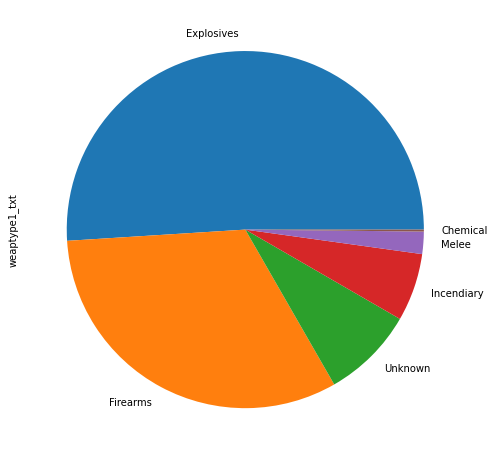

In [21]:
#Pie chart to show which weapon type is most famously used by terrorists
plt.figure(figsize=(8,15))
df["weaptype1_txt"].value_counts().head(6).plot.pie()
plt.show()

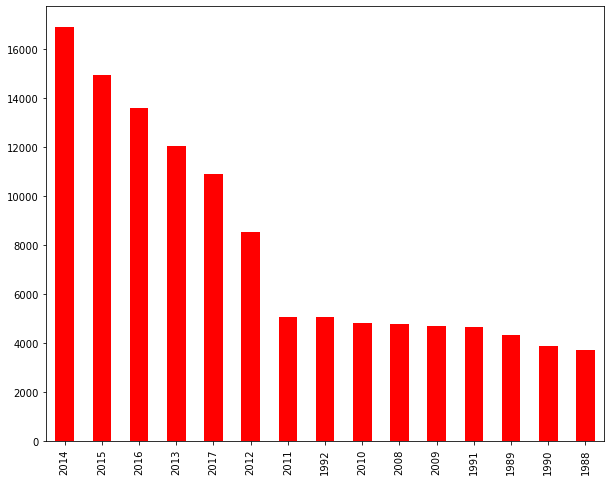

In [22]:
# Creating barplot to check which year had the highest number of terror attacks
plt.figure(figsize=(10,8))
df["iyear"].value_counts().head(15).plot.bar(color='red')
plt.show()

***Thus the year 2014 had the highest number of terror attacks followed by 2015, 2016 and 2013***

# Creating a vertical bar plot to find out which gang caused the most terror attacks.

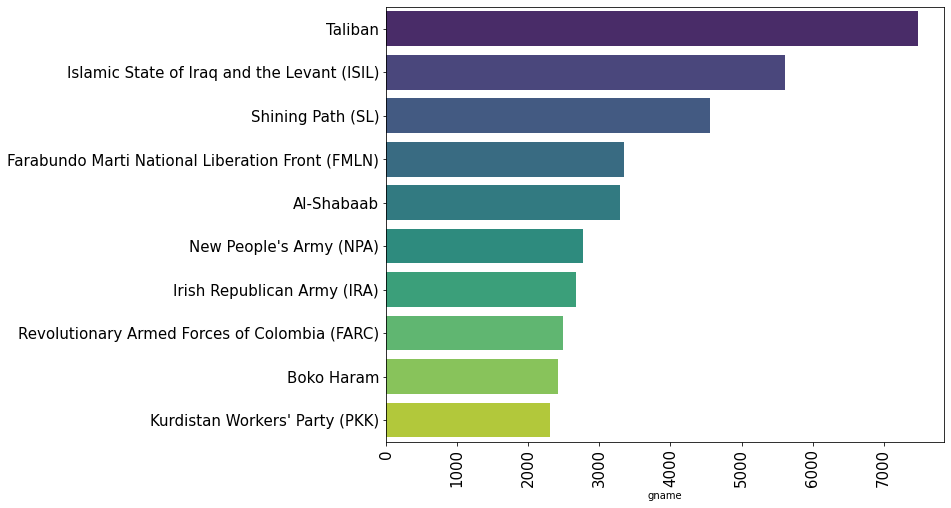

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["gname"].value_counts()[1:11],y=df["gname"].value_counts()[1:11].index,palette='viridis')
plt.xticks(fontsize=15)
plt.xticks(rotation = 90)
plt.yticks(fontsize=15)
plt.show()

***We can infer that the most frequent terror group is Taliban followed by Islamic State of Iraq and the Levant (ISIL),etc***